# DATA PRE-PROCESSING
 1. Collect Features
 2. Identify Missing Values
 3. Identify Outliers  
 4. Identify Imbalanced Data
 5. Plot Data Distributions 
 6. Pair Plots & Heatmap correlations

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

warnings.filterwarnings('ignore')
df = pd.read_csv('Schrimp_dataset.csv')

### 1. Collect  Features 

In [2]:
categorical_features = [feature for feature in df.columns if len(df[feature].unique()) < 6 and len(df[feature].unique()) > 2]
binary_features      = [feature for feature in df.columns if len(df[feature].unique()) == 2]
continuous_features  = [feature for feature in df.columns if feature not in categorical_features and feature not in binary_features]

### 2. Identify missing values

Temperature has 29.6137 % of missing values
pH has 27.897 % of missing values
Salinity has 28.7554 % of missing values


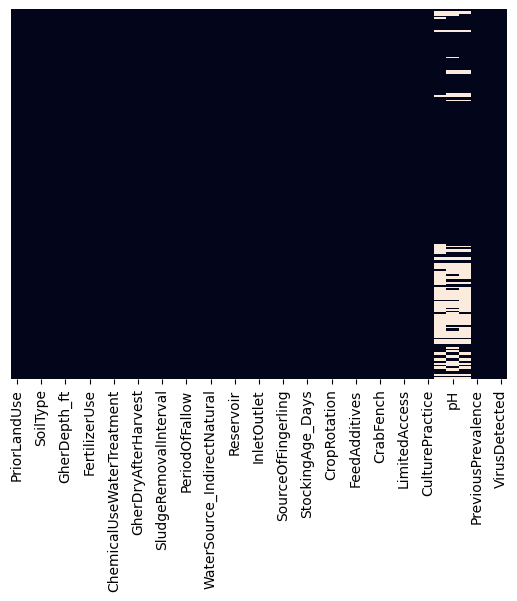

In [3]:
missing_features = [feature for feature in df.columns if df[feature].isnull().mean() > 0.05] # Collect features with NaN above 5%
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
for feature in missing_features:
    print(feature,'has', np.round(df[feature].isnull().mean()*100,4), '% of missing values')

Since there is high percentage of missing values, explore relationships between missing values and Virus Detection

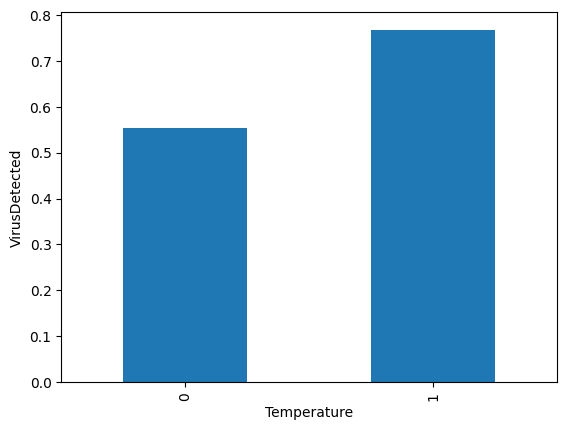

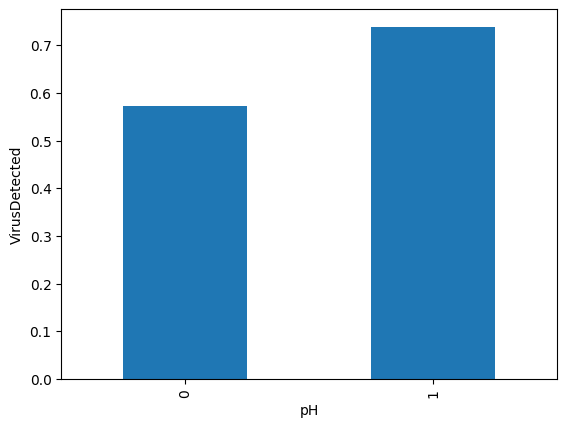

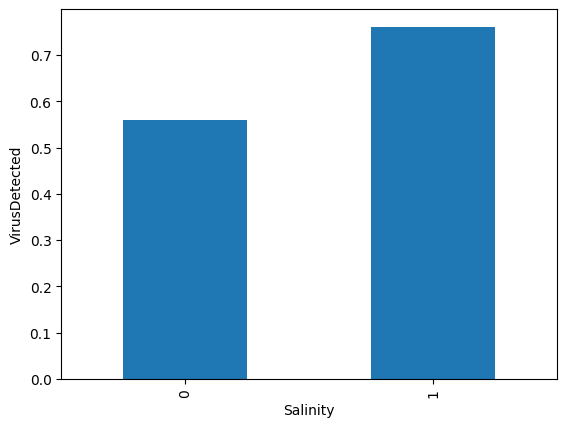

In [4]:
for feature in missing_features:
    copy_df = df.copy() # Copy of original dataset 
# a) Replace Null value with 1 and 0 otherwise 
    copy_df[feature] = np.where(copy_df[feature].isnull(), 1, 0)
# b) Explore relationship between the missing values (1's) against Virus Detection
    copy_df.groupby(feature)['VirusDetected'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('VirusDetected')
    plt.show()

It seems that missing values (coded as 1's) are somehow associated with the Virus Detection

### 3. Identify Outliers
    - Box Plot
    - Inter Quartile Range

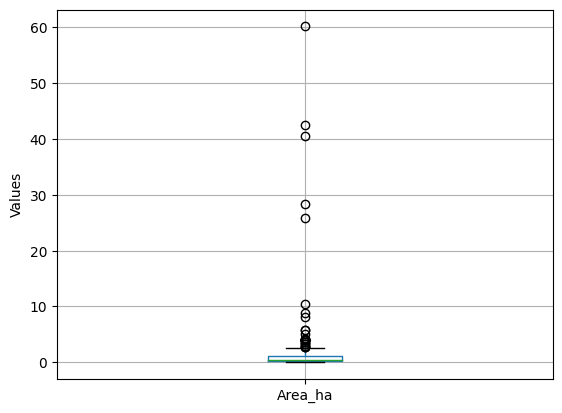

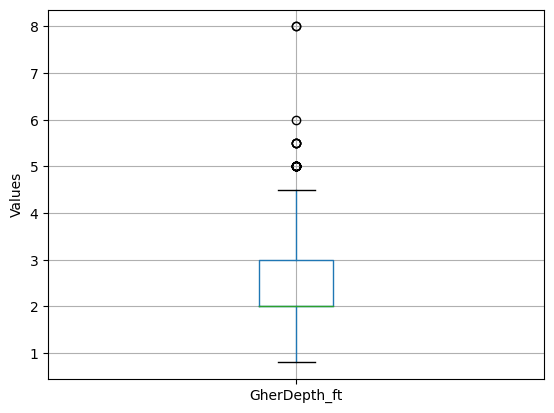

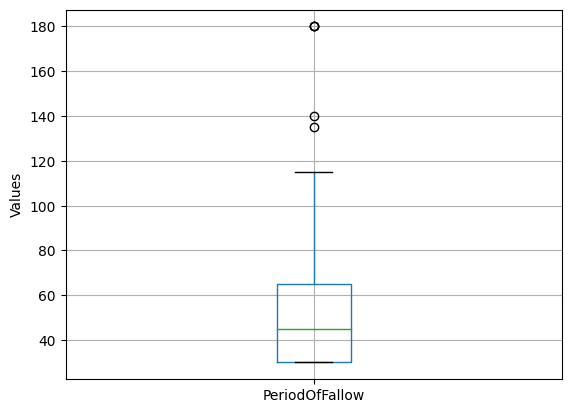

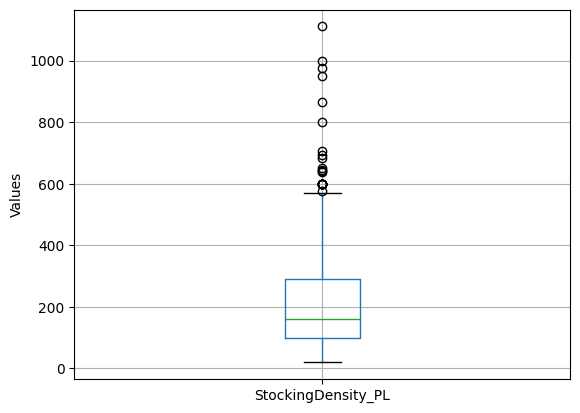

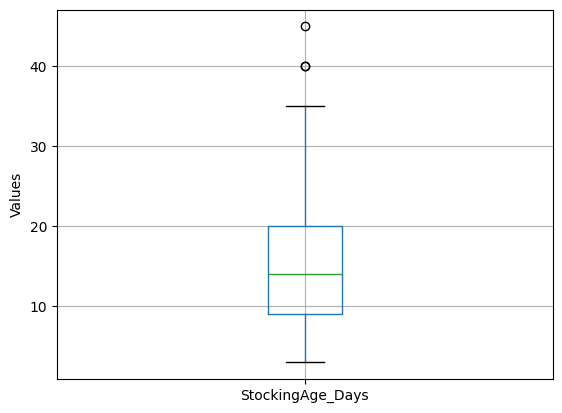

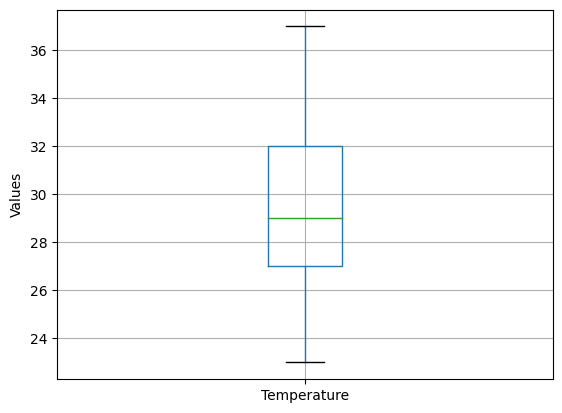

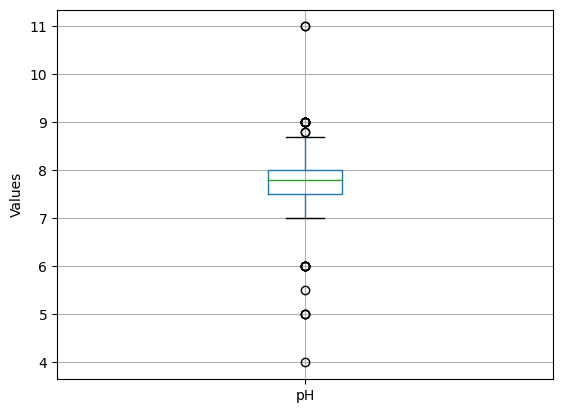

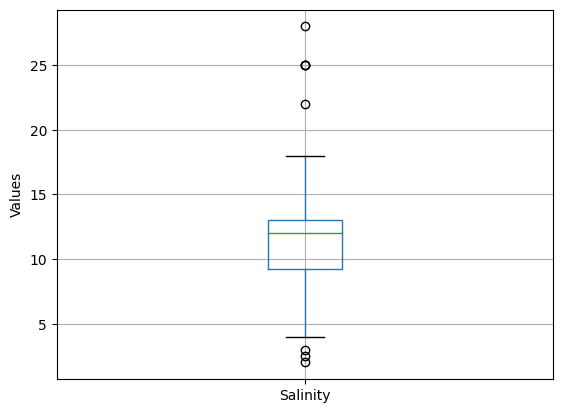

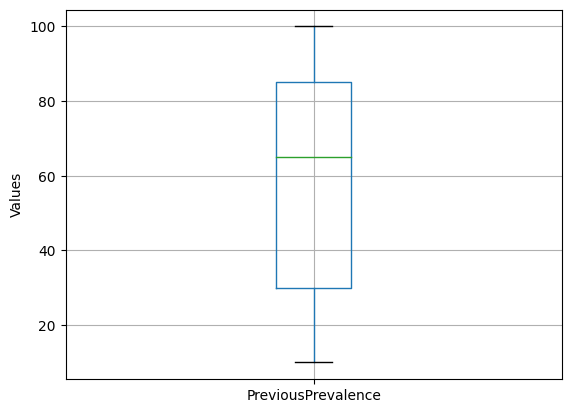

In [5]:
# Box Plot with/without LogGaussian transformation (Only for continuous variables)
for feature in continuous_features:
    copy_df = df.copy()
    if 0 in copy_df[feature].unique():
        pass
    else:
        #copy_df[feature] = np.log(copy_df[feature]) # LogGaussian transformation     
        copy_df.boxplot(column = feature)
        plt.ylabel('Values')
        plt.show()

In [6]:
# Inter Quartile Range
for feature in continuous_features:
    Q1 = df[feature].quantile(0.25) # Q1, Q3 = np.percentile(df[feature], [25 ,75])
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print('Lower_bound:', lower_bound,'  Upper_bound:', np.round(upper_bound,2),'  IQR:',np.round(IQR,2),'  Feature:', feature)

Lower_bound: -1.125   Upper_bound: 2.6   IQR: 0.93   Feature: Area_ha
Lower_bound: 0.0   Upper_bound: 8.0   IQR: 2.0   Feature: CanalDepth_ft
Lower_bound: 0.5   Upper_bound: 4.5   IQR: 1.0   Feature: GherDepth_ft
Lower_bound: -22.5   Upper_bound: 117.5   IQR: 35.0   Feature: PeriodOfFallow
Lower_bound: -183.5   Upper_bound: 572.5   IQR: 189.0   Feature: StockingDensity_PL
Lower_bound: -7.5   Upper_bound: 36.5   IQR: 11.0   Feature: StockingAge_Days
Lower_bound: 19.5   Upper_bound: 39.5   IQR: 5.0   Feature: Temperature
Lower_bound: 6.75   Upper_bound: 8.75   IQR: 0.5   Feature: pH
Lower_bound: 3.625   Upper_bound: 18.62   IQR: 3.75   Feature: Salinity
Lower_bound: -52.5   Upper_bound: 167.5   IQR: 55.0   Feature: PreviousPrevalence
Lower_bound: -105.0   Upper_bound: 175.0   IQR: 70.0   Feature: CurrentPrevalance


In [7]:
# This function returns a list of outliers assuming normality with a threshold of 2.5 standard deviations
def outlier_detector(df):
    copy_df  = df.copy()
    copy_np  = copy_df.to_numpy()
    cutoff   = 2.5
    
    outliers = []
    
    mean = np.mean(copy_np)
    std  = np.std(copy_np)
    
    for i in copy_df:
        z_score = (i - mean)/std
        if np.abs(z_score) > cutoff:
            outliers.append(i)
            
    return pd.DataFrame(outliers) 

In [8]:
for feature in df:
    print('Outliers: {} '.format(len(outlier_detector(df[feature]))), feature)

Outliers: 0  PriorLandUse
Outliers: 5  Area_ha
Outliers: 0  SoilType
Outliers: 2  CanalDepth_ft
Outliers: 3  GherDepth_ft
Outliers: 0  Operator
Outliers: 0  FertilizerUse
Outliers: 0  ChemicalUsePondPreparation
Outliers: 0  ChemicalUseWaterTreatment
Outliers: 23  Aerator
Outliers: 7  GherDryAfterHarvest
Outliers: 0  SludgeRemovalMethods
Outliers: 0  SludgeRemovalInterval
Outliers: 9  MaintainAndRepairDikes
Outliers: 5  PeriodOfFallow
Outliers: 7  WaterSource_DirectNatural
Outliers: 0  WaterSource_IndirectNatural
Outliers: 0  WaterComingViaOtherFarms
Outliers: 16  Reservoir
Outliers: 0  WaterExchangeFrequency
Outliers: 0  InletOutlet
Outliers: 0  CultureMethod
Outliers: 0  SourceOfFingerling
Outliers: 6  StockingDensity_PL
Outliers: 3  StockingAge_Days
Outliers: 12  PLQuality
Outliers: 0  CropRotation
Outliers: 0  FeedType
Outliers: 0  FeedAdditives
Outliers: 10  BirdScare
Outliers: 21  CrabFench
Outliers: 21  FootBath
Outliers: 25  LimitedAccess
Outliers: 0  SameEquipmentForWholeCultur

### 4. Identify Imbalanced data

<AxesSubplot:xlabel='VirusDetected', ylabel='count'>

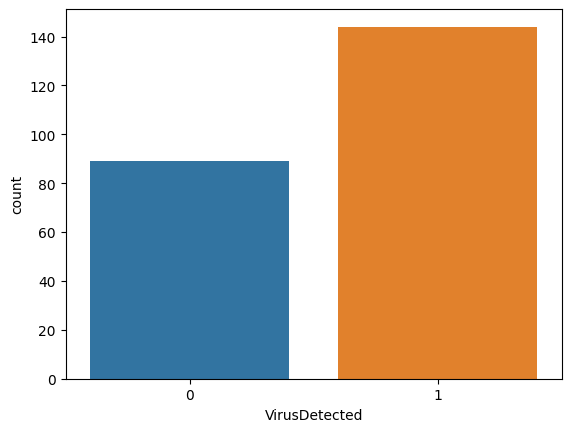

In [9]:
sns.countplot(x='VirusDetected', data=df)

No Imbalanced data is detected in the target variable

### 5. Find Data Distributions

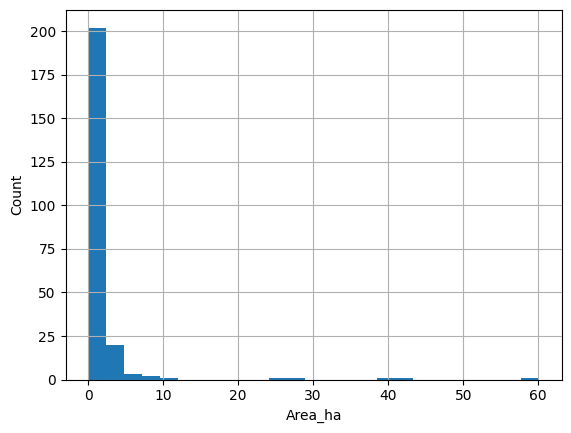

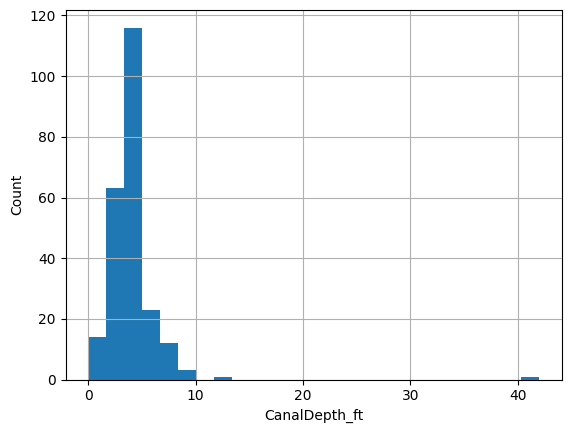

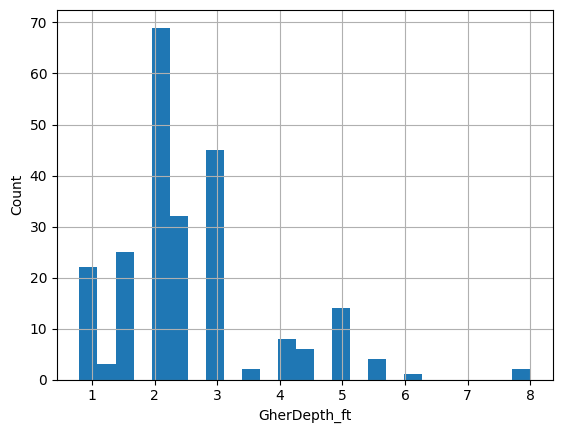

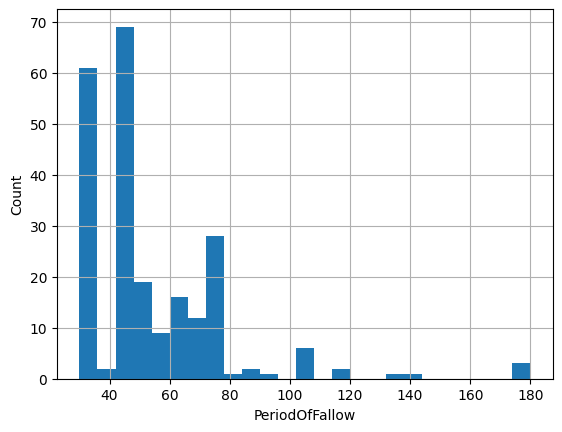

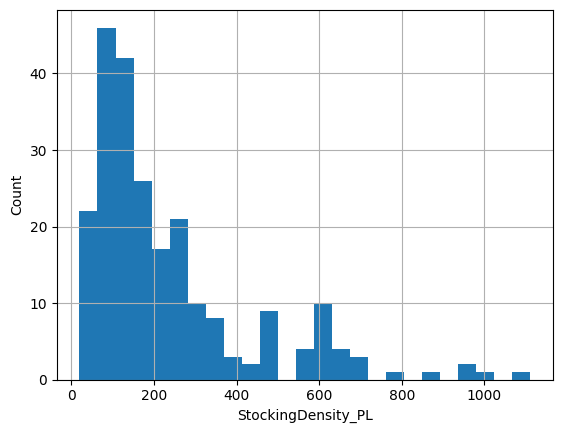

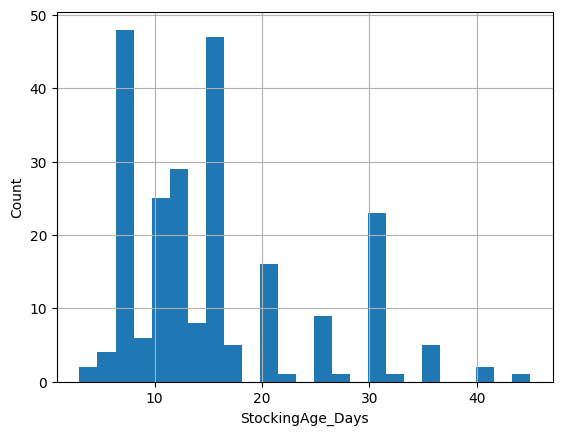

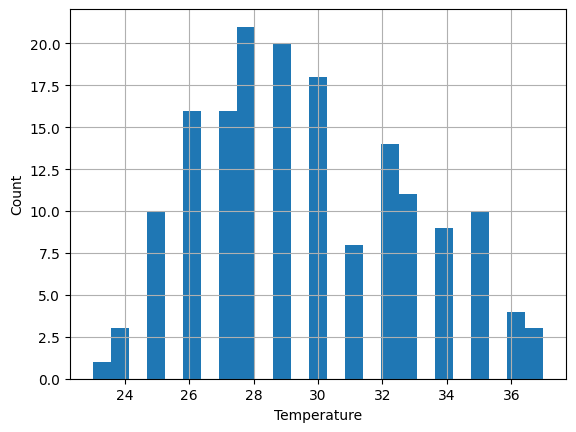

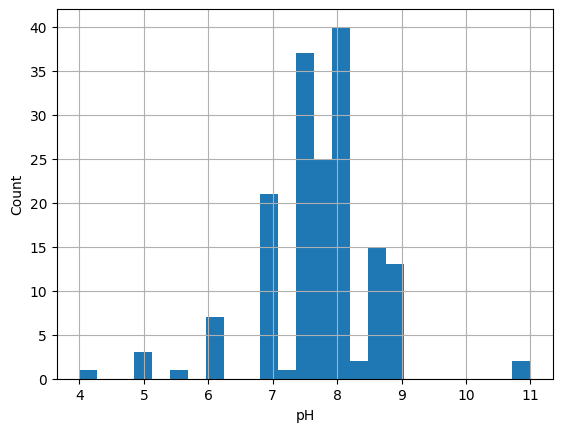

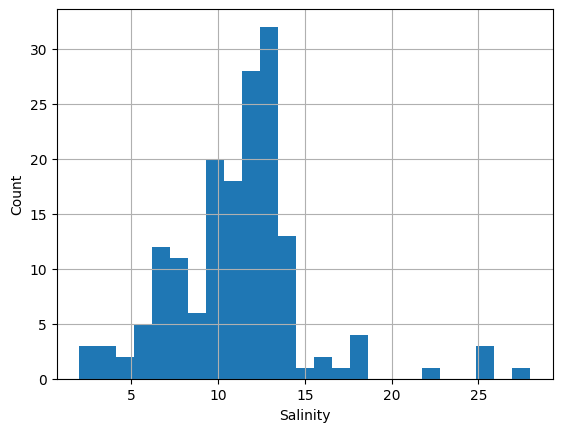

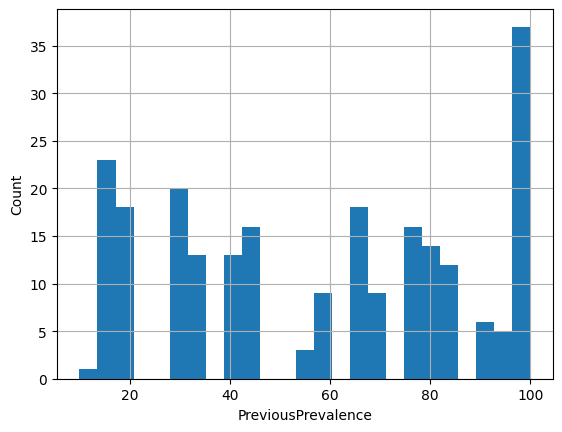

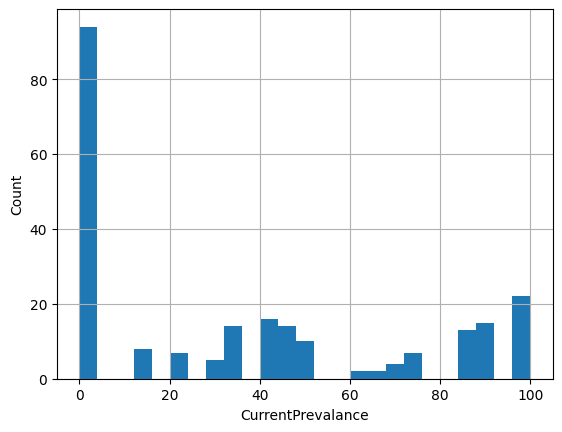

In [10]:
# Explore the distribution of each continuous feature
for feature in continuous_features: 
    df[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

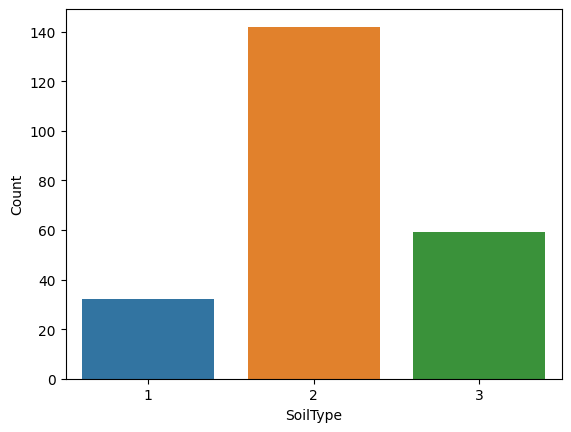

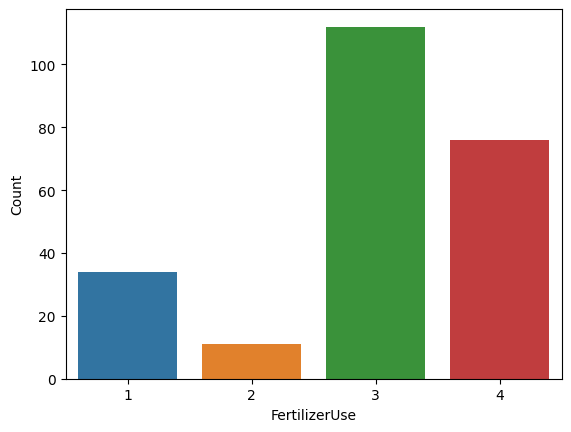

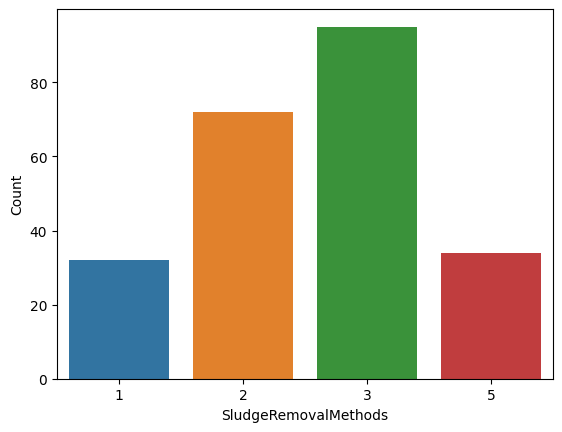

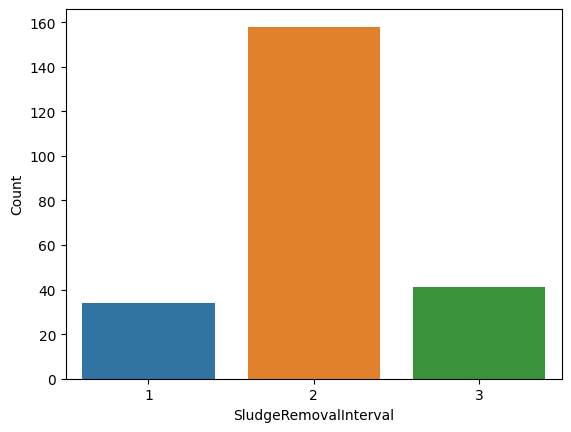

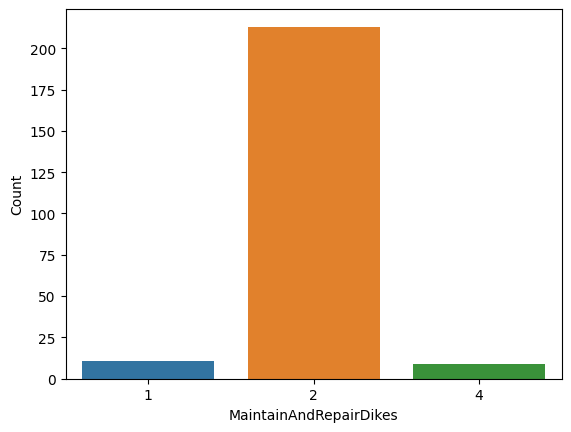

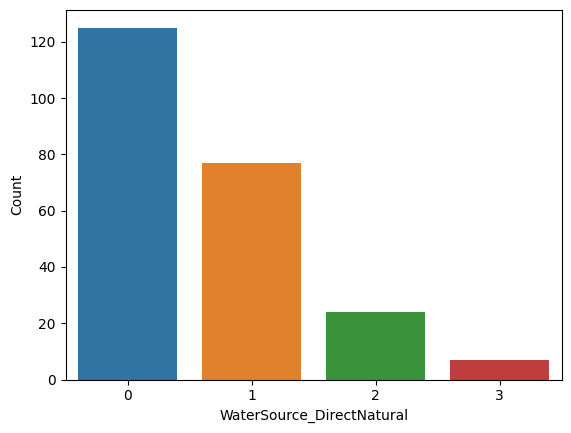

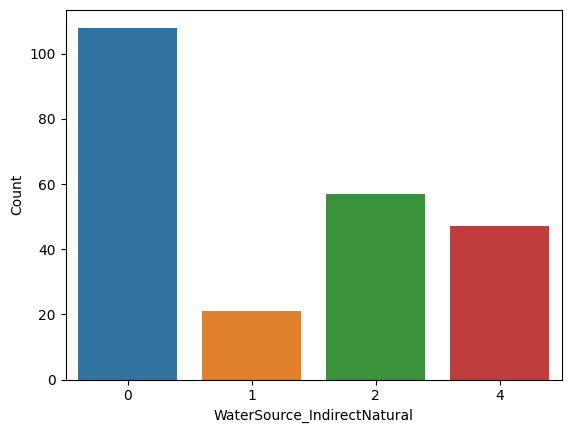

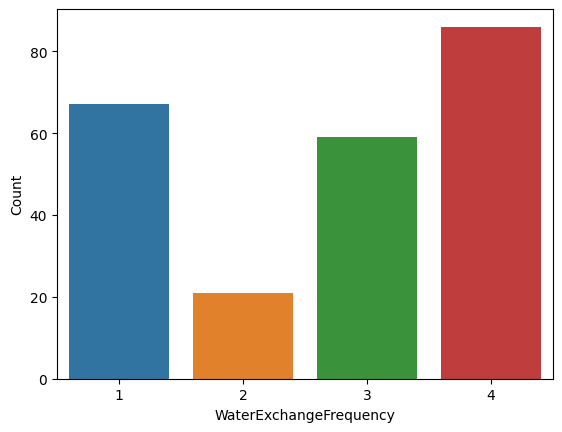

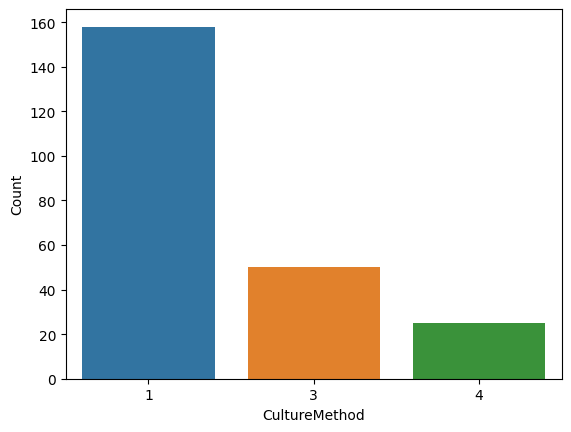

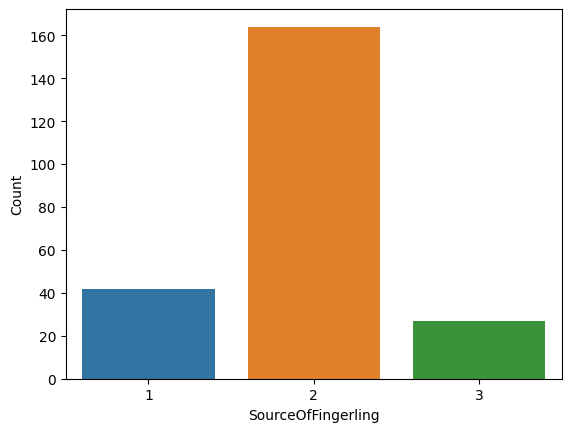

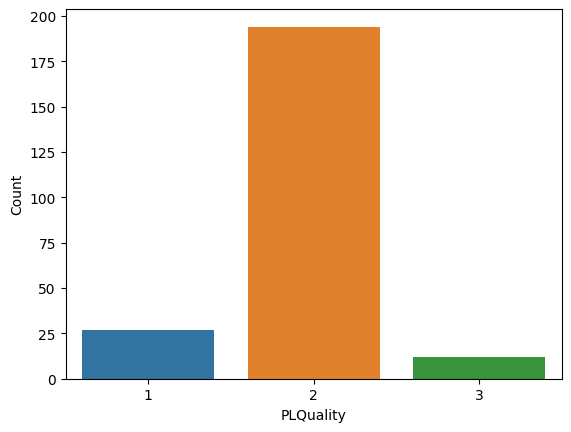

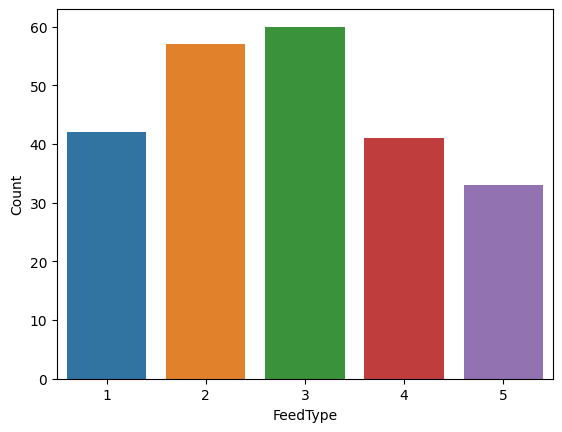

In [11]:
# Explore the distribution of each categorical feature
for feature in categorical_features: 
    sns.countplot(x=feature, data=df)
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### 6. Pair Plots & Heatmap Correlations

In [12]:
sns.pairplot(df,diag_kind='kde',kind='reg')

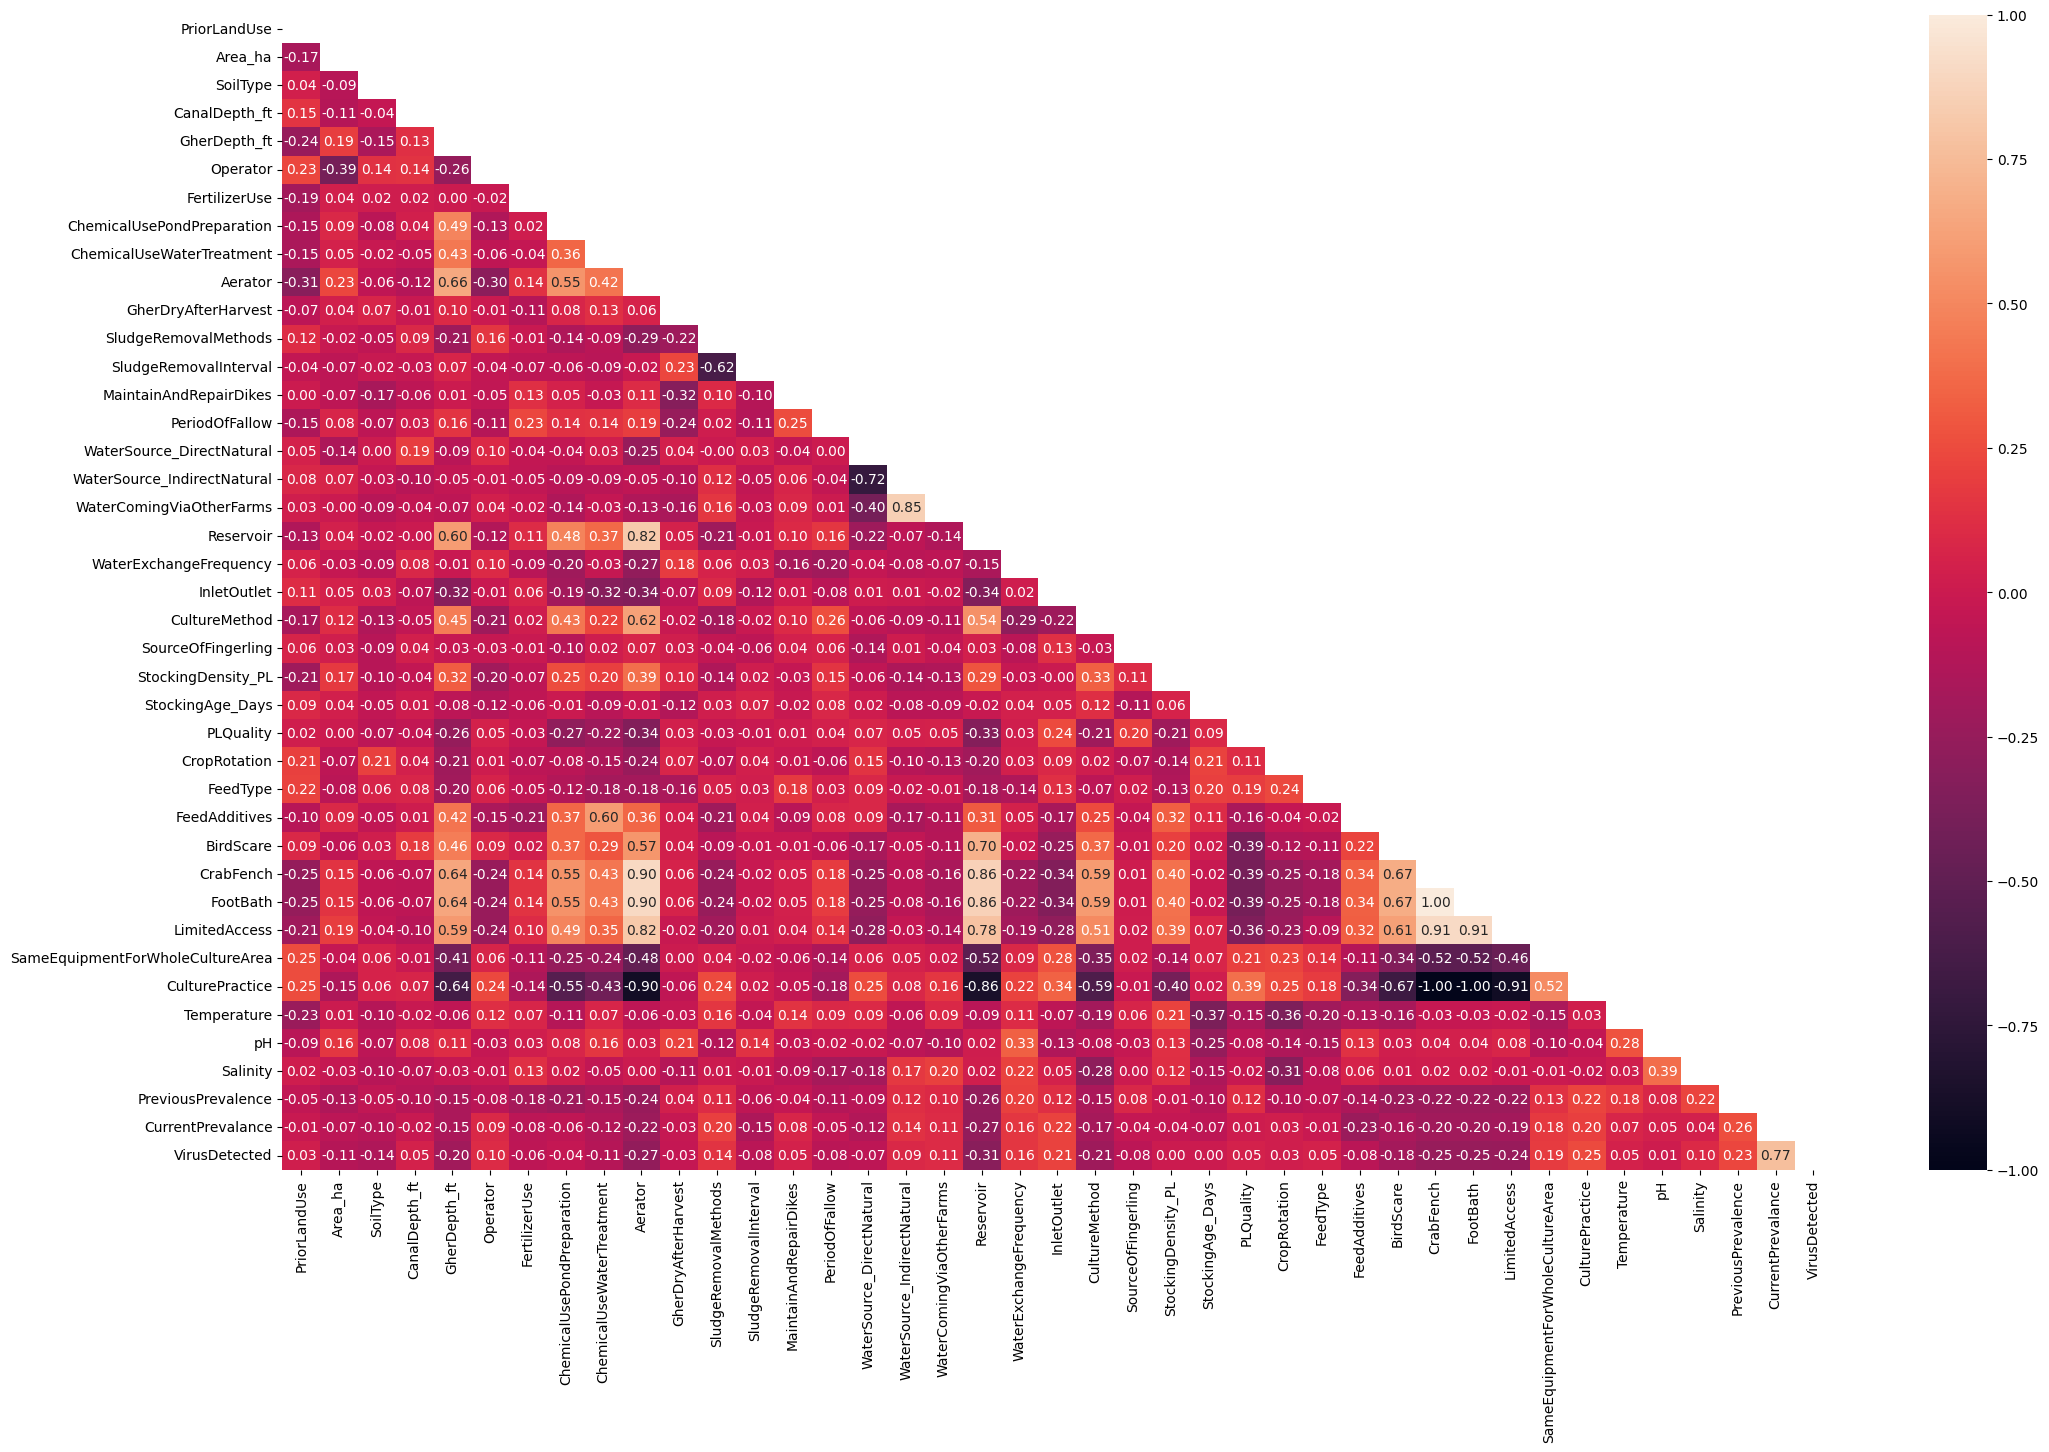

In [13]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()